In [2]:
# Import necessary libraries
import sys
sys.path.append('../src')  # Add the src directory to the system path

from load_data import Loaddata
from check_data_quality import checkdataquality
from clean_data_processing import cleandataprocessing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score,f1_score
import xgboost as xgb

In [3]:
file_path = '../data/MachineLearningRating_v3.txt'
load_data = Loaddata(file_path)
data = load_data.load_data()
print("Data loaded successfully.")
print(data.head())

Data loaded successfully.
   UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00:00             True   
2               145249     12827  2015-07-01 00:00:00             True   
3               145255     12827  2015-05-01 00:00:00             True   
4               145255     12827  2015-07-01 00:00:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...                    ExcessSelected CoverCategory  \
0  Current account  .

In [4]:
load_data.basic_info()
load_data.display_head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [5]:
# Clean the data
data_cleaner = cleandataprocessing(data)
cleaned_data = data_cleaner.clean_missing_values()
print("Verification of no missing values:", data_cleaner.verify_no_missing_values())


Verification of no missing values: True


In [6]:
# Display the first few rows of the cleaned data
cleaned_data.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [7]:
# Replace the original data with the cleaned data
data = cleaned_data

In [8]:
cleaned_data.shape

(1000098, 46)

In [9]:
cleaned_data.dtypes

UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               

In [10]:
cleaned_data.count()

UnderwrittenCoverID         1000098
PolicyID                    1000098
TransactionMonth            1000098
IsVATRegistered             1000098
Citizenship                 1000098
LegalType                   1000098
Title                       1000098
Language                    1000098
Bank                        1000098
AccountType                 1000098
MaritalStatus               1000098
Gender                      1000098
Country                     1000098
Province                    1000098
PostalCode                  1000098
MainCrestaZone              1000098
SubCrestaZone               1000098
ItemType                    1000098
mmcode                      1000098
VehicleType                 1000098
RegistrationYear            1000098
make                        1000098
Model                       1000098
Cylinders                   1000098
cubiccapacity               1000098
kilowatts                   1000098
bodytype                    1000098
NumberOfDoors               

In [11]:
cleaned_data.isnull().sum()

UnderwrittenCoverID         0
PolicyID                    0
TransactionMonth            0
IsVATRegistered             0
Citizenship                 0
LegalType                   0
Title                       0
Language                    0
Bank                        0
AccountType                 0
MaritalStatus               0
Gender                      0
Country                     0
Province                    0
PostalCode                  0
MainCrestaZone              0
SubCrestaZone               0
ItemType                    0
mmcode                      0
VehicleType                 0
RegistrationYear            0
make                        0
Model                       0
Cylinders                   0
cubiccapacity               0
kilowatts                   0
bodytype                    0
NumberOfDoors               0
VehicleIntroDate            0
AlarmImmobiliser            0
TrackingDevice              0
CapitalOutstanding          0
NewVehicle                  0
SumInsured

In [12]:
df = pd.DataFrame(data)

# Use the head() method to display the first few rows of the DataFrame
head_df = df.head()

# Print the head of the DataFrame
print("The head of the DataFrame is:\n", head_df)

The head of the DataFrame is:
    UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00:00             True   
2               145249     12827  2015-07-01 00:00:00             True   
3               145255     12827  2015-05-01 00:00:00             True   
4               145255     12827  2015-07-01 00:00:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...                    ExcessSelected CoverCategory  \
0  Current accou

In [13]:
# Detect missing values
missing_values = df.isnull()
print("Missing values in the DataFrame:\n", missing_values)

# Count missing values in each column
missing_count = df.isnull().sum()
print("Count of missing values in each column:\n", missing_count)

Missing values in the DataFrame:
          UnderwrittenCoverID  PolicyID  TransactionMonth  IsVATRegistered  \
0                      False     False             False            False   
1                      False     False             False            False   
2                      False     False             False            False   
3                      False     False             False            False   
4                      False     False             False            False   
...                      ...       ...               ...              ...   
1000093                False     False             False            False   
1000094                False     False             False            False   
1000095                False     False             False            False   
1000096                False     False             False            False   
1000097                False     False             False            False   

         Citizenship  LegalType  Title  L

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 46 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      1000098 non-null  object 
 9   AccountType               1000098 non-null  object 
 10  MaritalStatus             1000098 non-null  object 
 11  Gender                    1000098 non-null  object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [15]:
# Basic statistical details
data.describe()

,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,1.048175e+05,7.956682e+03,3.020601e+03,5.488056e+07,2.010225e+03,4.046616e+00,2.466869e+03,9.721553e+01,4.019239e+00,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
std,6.329371e+04,5.290039e+03,2.649854e+03,1.360059e+07,3.261391e+00,2.939410e-01,4.427106e+02,1.939061e+01,4.681854e-01,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03
min,1.000000e+00,1.400000e+01,1.000000e+00,4.041200e+06,1.987000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,8.270000e+02,6.005692e+07,2.008000e+03,4.000000e+00,2.237000e+03,7.500000e+01,4.000000e+00,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,2.000000e+03,6.005842e+07,2.011000e+03,4.000000e+00,2.694000e+03,1.110000e+02,4.000000e+00,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,4.180000e+03,6.005842e+07,2.013000e+03,4.000000e+00,2.694000e+03,1.110000e+02,4.000000e+00,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,3.011750e+05,2.324600e+04,9.870000e+03,6.506535e+07,2.015000e+03,1.000000e+01,1.288000e+04,3.090000e+02,6.000000e+00,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05


In [16]:
# Removing duplicate rows.
print('Duplicate Rows Count : ', data.duplicated().sum())
data=data.drop_duplicates(keep="first")

Duplicate Rows Count :  74


In [17]:
data.shape

(1000024, 46)

# Preparing the Data 

In [18]:

# Feature Engineering: Create new features that might be relevant to TotalPremium and TotalClaims
cleaned_data['RiskLevel'] = cleaned_data['TotalClaims'] / cleaned_data['SumInsured']
cleaned_data['ProfitMargin'] = cleaned_data['TotalPremium'] - cleaned_data['TotalClaims']


# encoding Categorical data 

In [19]:
# Convert categorical data into a numeric format using one-hot encoding or label encoding
label_enc_cols = ['TransactionMonth', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType',
                  'MaritalStatus', 'Gender', 'Country', 'Province', 'MainCrestaZone', 'SubCrestaZone', 'ItemType',
                  'VehicleType', 'make', 'Model', 'bodytype', 'VehicleIntroDate', 'AlarmImmobiliser',
                  'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'TermFrequency', 'ExcessSelected',
                  'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType']

for col in label_enc_cols:
    le = LabelEncoder()
    cleaned_data[col] = le.fit_transform(cleaned_data[col])

In [20]:
# Selecting features and target variable
features = cleaned_data.drop(columns=['TotalPremium', 'TotalClaims'])
target_premium = cleaned_data['TotalPremium']
target_claims = cleaned_data['TotalClaims']

In [21]:
# Train-Test Split: Divide the data into a training set and a test set
X_train, X_test, y_train_premium, y_test_premium = train_test_split(features, target_premium, test_size=0.3, random_state=42)
X_train, X_test, y_train_claims, y_test_claims = train_test_split(features, target_claims, test_size=0.3, random_state=42)

# Building a Model 

### Liner regression

In [22]:
# Linear Regression
lin_reg_premium = LinearRegression()
lin_reg_premium.fit(X_train, y_train_premium)
y_pred_premium_lr = lin_reg_premium.predict(X_test)

lin_reg_claims = LinearRegression()
lin_reg_claims.fit(X_train, y_train_claims)
y_pred_claims_lr = lin_reg_claims.predict(X_test)

# Results 

In [23]:
# Print predicted premiums
print("Predicted Premiums (Linear Regression):")
print(y_pred_premium_lr)

# Print predicted claims
print("\nPredicted Claims (Linear Regression):")
print(y_pred_claims_lr)


Predicted Premiums (Linear Regression):
[33.84063125  5.16646944 43.62041067 ... 16.92477338  6.1582544
 18.36789633]

Predicted Claims (Linear Regression):
[ 26.75861371  -0.63449547  38.72505979 ...  16.92477337   6.1582544
 -78.12333174]


### Decision tree

In [24]:
# Decision Tree
dt_reg_premium = DecisionTreeRegressor(random_state=42)
dt_reg_premium.fit(X_train, y_train_premium)
y_pred_premium_dt = dt_reg_premium.predict(X_test)

dt_reg_claims = DecisionTreeRegressor(random_state=42)
dt_reg_claims.fit(X_train, y_train_claims)
y_pred_claims_dt = dt_reg_claims.predict(X_test)

# Results 

In [25]:
# Print predicted premiums (Decision Tree)
print("Predicted Premiums (Decision Tree):")
print(y_pred_premium_dt)

# Print predicted claims (Decision Tree)
print("\nPredicted Claims (Decision Tree):")
print(y_pred_claims_dt)


Predicted Premiums (Decision Tree):
[ 7.08201754  5.80096491  4.89535088 ...  0.          0.
 96.49122807]

Predicted Claims (Decision Tree):
[0. 0. 0. ... 0. 0. 0.]


### Reandom Forest

In [26]:
# Random Forest
rf_reg_premium = RandomForestRegressor(random_state=42, n_estimators=100)
rf_reg_premium.fit(X_train, y_train_premium)
y_pred_premium_rf = rf_reg_premium.predict(X_test)

rf_reg_claims = RandomForestRegressor(random_state=42, n_estimators=100)
rf_reg_claims.fit(X_train, y_train_claims)
y_pred_claims_rf = rf_reg_claims.predict(X_test)

# Result 

In [27]:
# Print predicted premiums (Random Forest)
print("Predicted Premiums (Random Forest):")
print(y_pred_premium_rf)

# Print predicted claims (Random Forest)
print("\nPredicted Claims (Random Forest):")
print(y_pred_claims_rf)


Predicted Premiums (Random Forest):
[ 7.08201754  5.80096491  4.89534737 ...  0.          0.
 96.49122807]

Predicted Claims (Random Forest):
[0. 0. 0. ... 0. 0. 0.]


### XGBosst

In [28]:
# XGBoost
xgb_reg_premium = xgb.XGBRegressor(random_state=42, n_estimators=100)
xgb_reg_premium.fit(X_train, y_train_premium)
y_pred_premium_xgb = xgb_reg_premium.predict(X_test)

xgb_reg_claims = xgb.XGBRegressor(random_state=42, n_estimators=100)
xgb_reg_claims.fit(X_train, y_train_claims)
y_pred_claims_xgb = xgb_reg_claims.predict(X_test)

# Results 

In [29]:
# Print predicted premiums (XGBoost)
print("Predicted Premiums (XGBoost):")
print(y_pred_premium_xgb)

# Print predicted claims (XGBoost)
print("\nPredicted Claims (XGBoost):")
print(y_pred_claims_xgb)


Predicted Premiums (XGBoost):
[7.0336018e+00 5.6402774e+00 5.0746369e+00 ... 1.4283515e-02 1.7855439e-02
 9.5990402e+01]

Predicted Claims (XGBoost):
[-0.01408216 -0.01276096 -0.0139437  ... -0.01242465 -0.01395188
 -0.01146168]


## Evaluating the Model 

In [30]:
def evaluate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, rmse, r2

print("Linear Regression - TotalPremium: ", evaluate_model(y_test_premium, y_pred_premium_lr))
print("Linear Regression - TotalClaims: ", evaluate_model(y_test_claims, y_pred_claims_lr))

print("Decision Tree - TotalPremium: ", evaluate_model(y_test_premium, y_pred_premium_dt))
print("Decision Tree - TotalClaims: ", evaluate_model(y_test_claims, y_pred_claims_dt))

print("Random Forest - TotalPremium: ", evaluate_model(y_test_premium, y_pred_premium_rf))
print("Random Forest - TotalClaims: ", evaluate_model(y_test_claims, y_pred_claims_rf))

print("XGBoost - TotalPremium: ", evaluate_model(y_test_premium, y_pred_premium_xgb))
print("XGBoost - TotalClaims: ", evaluate_model(y_test_claims, y_pred_claims_xgb))

Linear Regression - TotalPremium:  (58.10973961050672, 28215.290896686794, np.float64(167.97407804981933), 0.46798984003466526)
Linear Regression - TotalClaims:  (58.1097396104991, 28215.290896685656, np.float64(167.97407804981594), 0.9947874950021134)
Decision Tree - TotalPremium:  (0.3327357088524947, 12544.819990981248, np.float64(112.00366061420158), 0.7634625949958942)
Decision Tree - TotalClaims:  (1.049087853787722, 16045.982211317385, np.float64(126.67273665362008), 0.9970356583322586)
Random Forest - TotalPremium:  (0.3900782083952794, 5472.5330733440705, np.float64(73.97657111102184), 0.8968132844553716)
Random Forest - TotalClaims:  (0.78528641480882, 12220.88620222068, np.float64(110.5481171355744), 0.9977423082171674)
XGBoost - TotalPremium:  (1.2182627431568311, 16737.326763275643, np.float64(129.37282080590052), 0.6844112675879601)
XGBoost - TotalClaims:  (52.16324322050216, 3200758.2085252316, np.float64(1789.0662951733318), 0.40869054938845106)


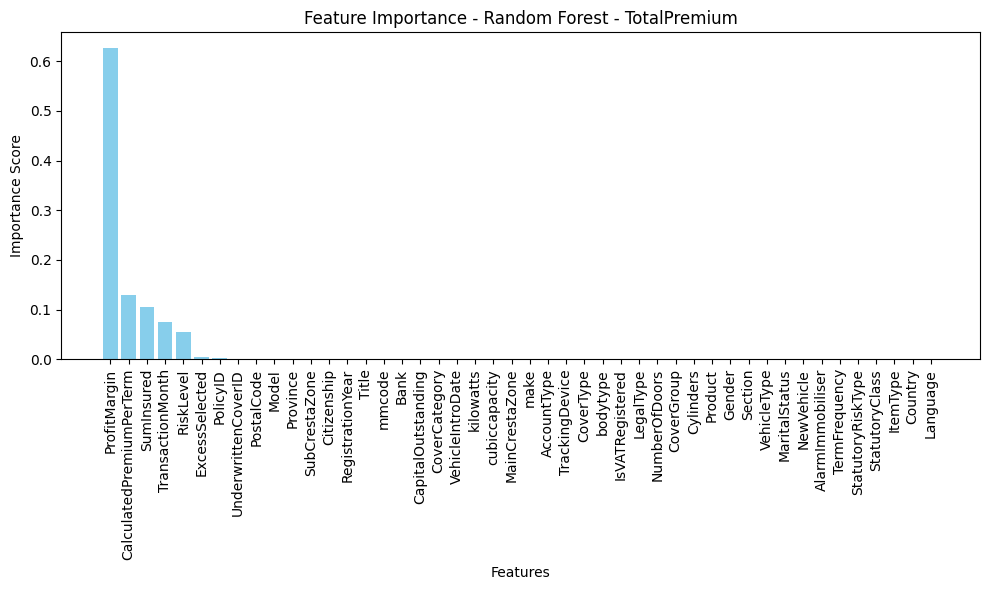

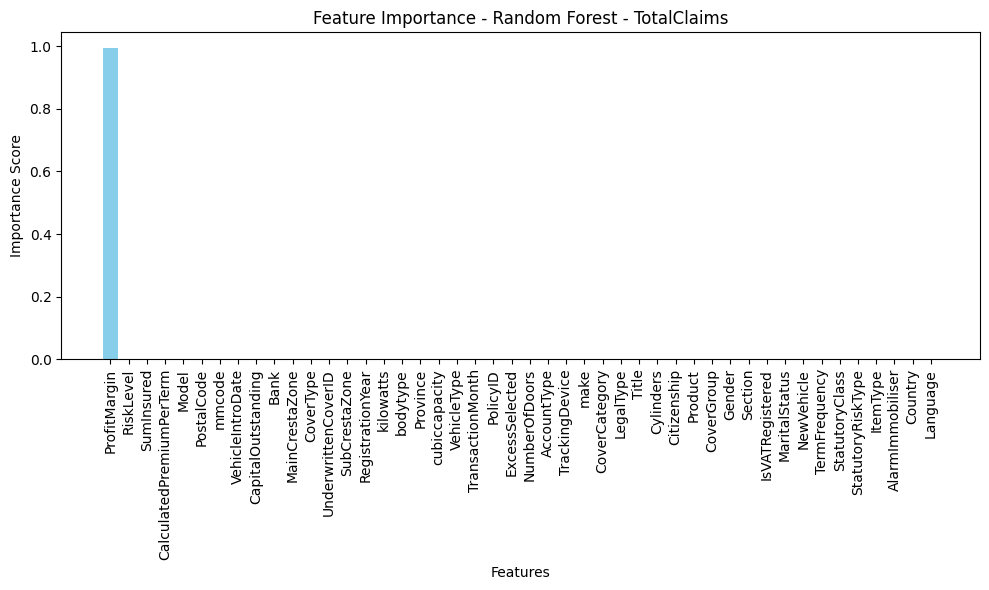

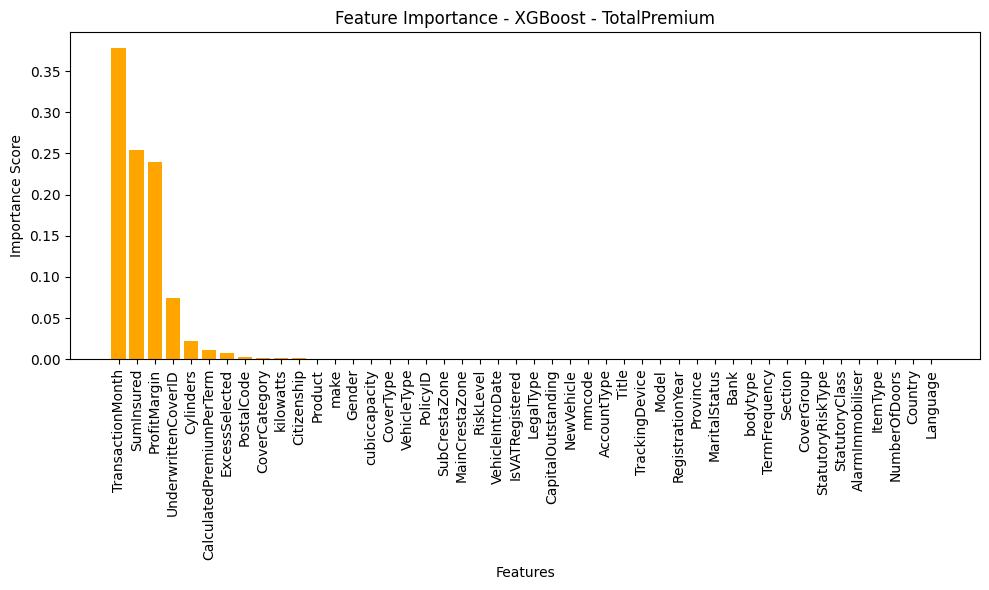

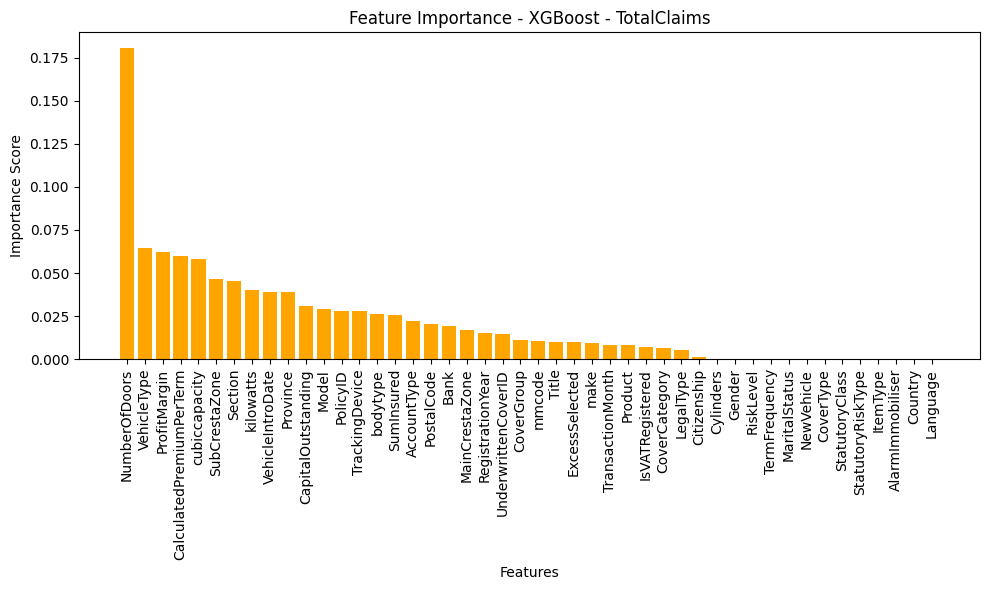

In [31]:

def plot_feature_importance(model, features, title_suffix="", color="skyblue"):
    """
    Plots the feature importance of a given model.

    Parameters:
    - model: trained ML model with `feature_importances_` attribute
    - features: DataFrame containing feature columns
    - title_suffix: additional info to add in the plot title
    - color: color of the bars in the plot
    """
    importance = model.feature_importances_
    indices = np.argsort(importance)[::-1]
    
    plt.figure(figsize=(10, 6))
    plt.title(f"Feature Importance - {title_suffix}")
    plt.bar(range(len(indices)), importance[indices], align='center', color=color)
    plt.xticks(range(len(indices)), [features.columns[i] for i in indices], rotation=90)
    plt.xlabel("Features")
    plt.ylabel("Importance Score")
    plt.tight_layout()
    plt.show()

# --- Plotting for all models ---
plot_feature_importance(rf_reg_premium, features, title_suffix="Random Forest - TotalPremium")
plot_feature_importance(rf_reg_claims, features, title_suffix="Random Forest - TotalClaims")
plot_feature_importance(xgb_reg_premium, features, title_suffix="XGBoost - TotalPremium", color="orange")
plot_feature_importance(xgb_reg_claims, features, title_suffix="XGBoost - TotalClaims", color="orange")
